#### Uninstalling and Installing required libraries

In [0]:
!pip uninstall matplotlib

!sudo apt-get install python3-dev graphviz libgraphviz-dev pkg-config

!sudo pip install pygraphviz

!pip install graphviz

#!pip show matplotlib


In [0]:
!pip install dowhy
import numpy as np
import pandas as pd
import dowhy
from dowhy import CausalModel
import dowhy.datasets
import dowhy.api


Uploading Data on google drive so Colab could use it

In [2]:
from google.colab import files
uploaded = files.upload()

Saving no_removal_preprocessed_data.xlsx to no_removal_preprocessed_data (1).xlsx


Importing Data as Pandas Dataframe

In [21]:
import pandas as pd
import io
df = pd.read_excel(io.BytesIO(uploaded['no_removal_preprocessed_data.xlsx']), index_col = 0)
df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,target,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0


In [37]:

corr = df.corr()['target'].sort_values()

# Display correlations
print('Top 10 - Positive Correlations:')
print('-----------------------------------')
print(corr.tail(10))
print('\nTop 10 - Negative Correlations:')
print('------------------------------')
print(corr.head(10))
print('------------------------------')
print(corr)

Top 10 - Positive Correlations:
-----------------------------------
dbar_y                            0.294535
PaymentMethod_Electronic check    0.301919
InternetService_Fiber optic       0.308020
TechSupport_No                    0.337281
OnlineSecurity_No                 0.342637
Contract_Month-to-month           0.405103
propensity_score                  0.425173
strata                            0.474577
d_y                               0.922133
target                            1.000000
Name: target, dtype: float64

Top 10 - Negative Correlations:
------------------------------
dbar                                   -0.405103
tenure                                 -0.352229
Contract_Two year                      -0.302253
DeviceProtection_No internet service   -0.227890
StreamingTV_No internet service        -0.227890
TechSupport_No internet service        -0.227890
OnlineBackup_No internet service       -0.227890
OnlineSecurity_No internet service     -0.227890
StreamingMovies_N



Creating a causal mode

In [22]:
model= CausalModel(
        data=df,
        treatment='Contract_Month-to-month',
        outcome="target",
        common_causes=['SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'gender', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
        instruments=[])
model.view_model(layout="dot")

INFO:dowhy.causal_graph:If this is observed data (not from a randomized experiment), there might always be missing confounders. Adding a node named "Unobserved Confounders" to reflect this.
INFO:dowhy.causal_model:Model to find the causal effect of treatment ['Contract_Month-to-month'] on outcome ['target']


#### Setting treatment column type to bool

In [0]:
df['Contract_Month-to-month'] = df['Contract_Month-to-month'].apply(bool)
# True indicates the contract was month to month

In [24]:
df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,target,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,True,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,False,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,True,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,False,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,True,0,0,0,0,1,0


View Model

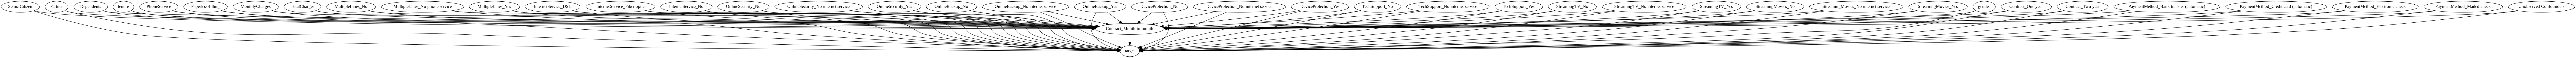

In [25]:

from IPython.display import Image, display
display(Image(filename="causal_model.png"))

Identify effect

In [26]:
identified_estimand = model.identify_effect()
print(identified_estimand)

INFO:dowhy.causal_identifier:Common causes of treatment and outcome:['MultipleLines_No phone service', 'OnlineBackup_No internet service', 'DeviceProtection_Yes', 'InternetService_No', 'TotalCharges', 'StreamingTV_No', 'PaymentMethod_Credit card (automatic)', 'StreamingMovies_No internet service', 'MultipleLines_Yes', 'OnlineBackup_Yes', 'OnlineSecurity_No', 'StreamingMovies_Yes', 'StreamingTV_No internet service', 'OnlineBackup_No', 'MonthlyCharges', 'TechSupport_No internet service', 'Partner', 'StreamingTV_Yes', 'StreamingMovies_No', 'InternetService_DSL', 'MultipleLines_No', 'TechSupport_No', 'PaperlessBilling', 'Dependents', 'OnlineSecurity_Yes', 'U', 'tenure', 'PaymentMethod_Bank transfer (automatic)', 'DeviceProtection_No', 'SeniorCitizen', 'OnlineSecurity_No internet service', 'Contract_One year', 'PhoneService', 'gender', 'Contract_Two year', 'PaymentMethod_Mailed check', 'DeviceProtection_No internet service', 'InternetService_Fiber optic', 'PaymentMethod_Electronic check', '

WARN: Do you want to continue by ignoring any unobserved confounders? (use proceed_when_unidentifiable=True to disable this prompt) [y/n] y


INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:[]


Estimand type: nonparametric-ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
            d                                                                 
──────────────────────────(Expectation(target|MultipleLines_No phone service,O
d[Contract_Month-to-month]                                                    

                                                                              
nlineBackup_No internet service,DeviceProtection_Yes,InternetService_No,TotalC
                                                                              

                                                                              
harges,StreamingTV_No,PaymentMethod_Credit card (automatic),StreamingMovies_No
                                                                              

                                                                              
 internet service,MultipleLines_Yes,OnlineBackup_Yes,OnlineSecurity_No,Streami
                                 

In [27]:
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)


INFO:dowhy.causal_identifier:Common causes of treatment and outcome:['MultipleLines_No phone service', 'OnlineBackup_No internet service', 'DeviceProtection_Yes', 'InternetService_No', 'TotalCharges', 'StreamingTV_No', 'PaymentMethod_Credit card (automatic)', 'StreamingMovies_No internet service', 'MultipleLines_Yes', 'OnlineBackup_Yes', 'OnlineSecurity_No', 'StreamingMovies_Yes', 'StreamingTV_No internet service', 'OnlineBackup_No', 'MonthlyCharges', 'TechSupport_No internet service', 'Partner', 'StreamingTV_Yes', 'StreamingMovies_No', 'InternetService_DSL', 'MultipleLines_No', 'TechSupport_No', 'PaperlessBilling', 'Dependents', 'OnlineSecurity_Yes', 'U', 'tenure', 'PaymentMethod_Bank transfer (automatic)', 'DeviceProtection_No', 'SeniorCitizen', 'OnlineSecurity_No internet service', 'Contract_One year', 'PhoneService', 'gender', 'Contract_Two year', 'PaymentMethod_Mailed check', 'DeviceProtection_No internet service', 'InternetService_Fiber optic', 'PaymentMethod_Electronic check', '

Estimand type: nonparametric-ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
            d                                                                 
──────────────────────────(Expectation(target|MultipleLines_No phone service,O
d[Contract_Month-to-month]                                                    

                                                                              
nlineBackup_No internet service,DeviceProtection_Yes,InternetService_No,TotalC
                                                                              

                                                                              
harges,StreamingTV_No,PaymentMethod_Credit card (automatic),StreamingMovies_No
                                                                              

                                                                              
 internet service,MultipleLines_Yes,OnlineBackup_Yes,OnlineSecurity_No,Streami
                                 

Estimate effect

In [28]:
causal_estimate = model.estimate_effect(identified_estimand,
        method_name="backdoor.propensity_score_stratification")
print(causal_estimate)
print("Causal Estimate is " + str(causal_estimate.value))

INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: target~Contract_Month-to-month+MultipleLines_No phone service+OnlineBackup_No internet service+DeviceProtection_Yes+InternetService_No+TotalCharges+StreamingTV_No+PaymentMethod_Credit card (automatic)+StreamingMovies_No internet service+MultipleLines_Yes+OnlineBackup_Yes+OnlineSecurity_No+StreamingMovies_Yes+StreamingTV_No internet service+OnlineBackup_No+MonthlyCharges+TechSupport_No internet service+Partner+StreamingTV_Yes+StreamingMovies_No+InternetService_DSL+MultipleLines_No+TechSupport_No+PaperlessBilling+Dependents+OnlineSecurity_Yes+tenure+PaymentMethod_Bank transfer (automatic)+DeviceProtection_No+SeniorCitizen+OnlineSecurity_No internet service+Contract_One year+PhoneService+gender+Contract_Two year+PaymentMethod_Mailed check+DeviceProtection_No internet service+InternetService_Fiber optic+PaymentMethod_Electronic check+TechSupport_Yes
/usr/local/lib/python3.6/dist

*** Causal Estimate ***

## Target estimand
Estimand type: nonparametric-ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
            d                                                                 
──────────────────────────(Expectation(target|MultipleLines_No phone service,O
d[Contract_Month-to-month]                                                    

                                                                              
nlineBackup_No internet service,DeviceProtection_Yes,InternetService_No,TotalC
                                                                              

                                                                              
harges,StreamingTV_No,PaymentMethod_Credit card (automatic),StreamingMovies_No
                                                                              

                                                                              
 internet service,MultipleLines_Yes,OnlineBackup_Yes,OnlineSecurity_

In [29]:
# Causal effect on the control group (ATC)
causal_estimate_att = model.estimate_effect(identified_estimand,
        method_name="backdoor.propensity_score_stratification",
        target_units = "atc")
print(causal_estimate_att)
print("Causal Estimate is " + str(causal_estimate_att.value))

INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: target~Contract_Month-to-month+MultipleLines_No phone service+OnlineBackup_No internet service+DeviceProtection_Yes+InternetService_No+TotalCharges+StreamingTV_No+PaymentMethod_Credit card (automatic)+StreamingMovies_No internet service+MultipleLines_Yes+OnlineBackup_Yes+OnlineSecurity_No+StreamingMovies_Yes+StreamingTV_No internet service+OnlineBackup_No+MonthlyCharges+TechSupport_No internet service+Partner+StreamingTV_Yes+StreamingMovies_No+InternetService_DSL+MultipleLines_No+TechSupport_No+PaperlessBilling+Dependents+OnlineSecurity_Yes+tenure+PaymentMethod_Bank transfer (automatic)+DeviceProtection_No+SeniorCitizen+OnlineSecurity_No internet service+Contract_One year+PhoneService+gender+Contract_Two year+PaymentMethod_Mailed check+DeviceProtection_No internet service+InternetService_Fiber optic+PaymentMethod_Electronic check+TechSupport_Yes
/usr/local/lib/python3.6/dist

*** Causal Estimate ***

## Target estimand
Estimand type: nonparametric-ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
            d                                                                 
──────────────────────────(Expectation(target|MultipleLines_No phone service,O
d[Contract_Month-to-month]                                                    

                                                                              
nlineBackup_No internet service,DeviceProtection_Yes,InternetService_No,TotalC
                                                                              

                                                                              
harges,StreamingTV_No,PaymentMethod_Credit card (automatic),StreamingMovies_No
                                                                              

                                                                              
 internet service,MultipleLines_Yes,OnlineBackup_Yes,OnlineSecurity_

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [30]:
# Identify causal effect and return target estimands
identified_estimand = model.identify_effect()

# Estimate the target estimand using a statistical method.
estimate = model.estimate_effect(identified_estimand,
                                 method_name="backdoor.propensity_score_matching")

# Refute the obtained estimate using multiple robustness checks.
refute_results = model.refute_estimate(identified_estimand, estimate,
                                       method_name="random_common_cause")

INFO:dowhy.causal_identifier:Common causes of treatment and outcome:['MultipleLines_No phone service', 'OnlineBackup_No internet service', 'DeviceProtection_Yes', 'InternetService_No', 'TotalCharges', 'StreamingTV_No', 'PaymentMethod_Credit card (automatic)', 'StreamingMovies_No internet service', 'MultipleLines_Yes', 'OnlineBackup_Yes', 'OnlineSecurity_No', 'StreamingMovies_Yes', 'StreamingTV_No internet service', 'OnlineBackup_No', 'MonthlyCharges', 'TechSupport_No internet service', 'Partner', 'StreamingTV_Yes', 'StreamingMovies_No', 'InternetService_DSL', 'MultipleLines_No', 'TechSupport_No', 'PaperlessBilling', 'Dependents', 'OnlineSecurity_Yes', 'U', 'tenure', 'PaymentMethod_Bank transfer (automatic)', 'DeviceProtection_No', 'SeniorCitizen', 'OnlineSecurity_No internet service', 'Contract_One year', 'PhoneService', 'gender', 'Contract_Two year', 'PaymentMethod_Mailed check', 'DeviceProtection_No internet service', 'InternetService_Fiber optic', 'PaymentMethod_Electronic check', '

WARN: Do you want to continue by ignoring any unobserved confounders? (use proceed_when_unidentifiable=True to disable this prompt) [y/n] y


INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:[]
INFO:dowhy.causal_estimator:INFO: Using Propensity Score Matching Estimator
INFO:dowhy.causal_estimator:b: target~Contract_Month-to-month+MultipleLines_No phone service+OnlineBackup_No internet service+DeviceProtection_Yes+InternetService_No+TotalCharges+StreamingTV_No+PaymentMethod_Credit card (automatic)+StreamingMovies_No internet service+MultipleLines_Yes+OnlineBackup_Yes+OnlineSecurity_No+StreamingMovies_Yes+StreamingTV_No internet service+OnlineBackup_No+MonthlyCharges+TechSupport_No internet service+Partner+StreamingTV_Yes+StreamingMovies_No+InternetService_DSL+MultipleLines_No+TechSupport_No+PaperlessBilling+Dependents+OnlineSecurity_Yes+tenure+PaymentMethod_Bank transfer (automatic)+DeviceProtection_No+SeniorCitizen+OnlineSecurity_No internet service+Contract_One year+PhoneService+gender+Contract_Two year+PaymentMethod_Mailed check+DeviceProtection_No internet service+InternetService_Fiber optic+P

In [31]:
print(refute_results)

Refute: Add a Random Common Cause
Estimated effect:(0.21198352974584694,)
New effect:(0.2046003123668891,)



In [32]:
print(estimate)

*** Causal Estimate ***

## Target estimand
Estimand type: nonparametric-ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
            d                                                                 
──────────────────────────(Expectation(target|MultipleLines_No phone service,O
d[Contract_Month-to-month]                                                    

                                                                              
nlineBackup_No internet service,DeviceProtection_Yes,InternetService_No,TotalC
                                                                              

                                                                              
harges,StreamingTV_No,PaymentMethod_Credit card (automatic),StreamingMovies_No
                                                                              

                                                                              
 internet service,MultipleLines_Yes,OnlineBackup_Yes,OnlineSecurity_

In [33]:
res_subset=model.refute_estimate(identified_estimand, estimate,
        method_name="data_subset_refuter", subset_fraction=0.9, random_seed = 1)
print(res_subset)

INFO:dowhy.causal_estimator:INFO: Using Propensity Score Matching Estimator
INFO:dowhy.causal_estimator:b: target~Contract_Month-to-month+MultipleLines_No phone service+OnlineBackup_No internet service+DeviceProtection_Yes+InternetService_No+TotalCharges+StreamingTV_No+PaymentMethod_Credit card (automatic)+StreamingMovies_No internet service+MultipleLines_Yes+OnlineBackup_Yes+OnlineSecurity_No+StreamingMovies_Yes+StreamingTV_No internet service+OnlineBackup_No+MonthlyCharges+TechSupport_No internet service+Partner+StreamingTV_Yes+StreamingMovies_No+InternetService_DSL+MultipleLines_No+TechSupport_No+PaperlessBilling+Dependents+OnlineSecurity_Yes+tenure+PaymentMethod_Bank transfer (automatic)+DeviceProtection_No+SeniorCitizen+OnlineSecurity_No internet service+Contract_One year+PhoneService+gender+Contract_Two year+PaymentMethod_Mailed check+DeviceProtection_No internet service+InternetService_Fiber optic+PaymentMethod_Electronic check+TechSupport_Yes
/usr/local/lib/python3.6/dist-packa

Refute: Use a subset of data
Estimated effect:(0.21198352974584694,)
New effect:(0.2033443760845559,)



In [34]:
res_placebo=model.refute_estimate(identified_estimand, estimate,
        method_name="placebo_treatment_refuter", placebo_type="permute")
print(res_placebo)

INFO:dowhy.causal_estimator:INFO: Using Propensity Score Matching Estimator
INFO:dowhy.causal_estimator:b: target~placebo+MultipleLines_No phone service+OnlineBackup_No internet service+DeviceProtection_Yes+InternetService_No+TotalCharges+StreamingTV_No+PaymentMethod_Credit card (automatic)+StreamingMovies_No internet service+MultipleLines_Yes+OnlineBackup_Yes+OnlineSecurity_No+StreamingMovies_Yes+StreamingTV_No internet service+OnlineBackup_No+MonthlyCharges+TechSupport_No internet service+Partner+StreamingTV_Yes+StreamingMovies_No+InternetService_DSL+MultipleLines_No+TechSupport_No+PaperlessBilling+Dependents+OnlineSecurity_Yes+tenure+PaymentMethod_Bank transfer (automatic)+DeviceProtection_No+SeniorCitizen+OnlineSecurity_No internet service+Contract_One year+PhoneService+gender+Contract_Two year+PaymentMethod_Mailed check+DeviceProtection_No internet service+InternetService_Fiber optic+PaymentMethod_Electronic check+TechSupport_Yes
/usr/local/lib/python3.6/dist-packages/sklearn/util

Refute: Use a Placebo Treatment
Estimated effect:(0.21198352974584694,)
New effect:(0.0021297742439301435,)



In [35]:
res_random=model.refute_estimate(identified_estimand, estimate, method_name="random_common_cause")
print(res_random)

INFO:dowhy.causal_estimator:INFO: Using Propensity Score Matching Estimator
INFO:dowhy.causal_estimator:b: target~Contract_Month-to-month+MultipleLines_No phone service+OnlineBackup_No internet service+DeviceProtection_Yes+InternetService_No+TotalCharges+StreamingTV_No+PaymentMethod_Credit card (automatic)+StreamingMovies_No internet service+MultipleLines_Yes+OnlineBackup_Yes+OnlineSecurity_No+StreamingMovies_Yes+StreamingTV_No internet service+OnlineBackup_No+MonthlyCharges+TechSupport_No internet service+Partner+StreamingTV_Yes+StreamingMovies_No+InternetService_DSL+MultipleLines_No+TechSupport_No+PaperlessBilling+Dependents+OnlineSecurity_Yes+tenure+PaymentMethod_Bank transfer (automatic)+DeviceProtection_No+SeniorCitizen+OnlineSecurity_No internet service+Contract_One year+PhoneService+gender+Contract_Two year+PaymentMethod_Mailed check+DeviceProtection_No internet service+InternetService_Fiber optic+PaymentMethod_Electronic check+TechSupport_Yes+w_random
/usr/local/lib/python3.6/d

Refute: Add a Random Common Cause
Estimated effect:(0.21198352974584694,)
New effect:(0.2108476501490842,)



In [36]:
causal_estimate_reg = model.estimate_effect(identified_estimand,
        method_name="backdoor.linear_regression",
        test_significance=True)
print(causal_estimate_reg)
print("Causal Estimate is " + str(causal_estimate_reg.value))

INFO:dowhy.causal_estimator:INFO: Using Linear Regression Estimator
INFO:dowhy.causal_estimator:b: target~Contract_Month-to-month+MultipleLines_No phone service+OnlineBackup_No internet service+DeviceProtection_Yes+InternetService_No+TotalCharges+StreamingTV_No+PaymentMethod_Credit card (automatic)+StreamingMovies_No internet service+MultipleLines_Yes+OnlineBackup_Yes+OnlineSecurity_No+StreamingMovies_Yes+StreamingTV_No internet service+OnlineBackup_No+MonthlyCharges+TechSupport_No internet service+Partner+StreamingTV_Yes+StreamingMovies_No+InternetService_DSL+MultipleLines_No+TechSupport_No+PaperlessBilling+Dependents+OnlineSecurity_Yes+tenure+PaymentMethod_Bank transfer (automatic)+DeviceProtection_No+SeniorCitizen+OnlineSecurity_No internet service+Contract_One year+PhoneService+gender+Contract_Two year+PaymentMethod_Mailed check+DeviceProtection_No internet service+InternetService_Fiber optic+PaymentMethod_Electronic check+TechSupport_Yes


*** Causal Estimate ***

## Target estimand
Estimand type: nonparametric-ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
            d                                                                 
──────────────────────────(Expectation(target|MultipleLines_No phone service,O
d[Contract_Month-to-month]                                                    

                                                                              
nlineBackup_No internet service,DeviceProtection_Yes,InternetService_No,TotalC
                                                                              

                                                                              
harges,StreamingTV_No,PaymentMethod_Credit card (automatic),StreamingMovies_No
                                                                              

                                                                              
 internet service,MultipleLines_Yes,OnlineBackup_Yes,OnlineSecurity_

# Interpretation
In my model that predicts whether or not a person stops using the telecom service, my hypothesis is that if a person's contract is from month to month then the person is more likely to churn.

There is high correlation between 'Contract_Month-to-month' and 'target' but whether there is causal relationship and not just correlation remains to be seen.

Sure enough, the p-value of less than 0.001 tells us that there is indeed causal relaationship between the treatment and the outcome which is what I expected.

Moreover, the value for causal estimate remains robust and fairly consistent even after various attempts of refuting the estimate.

Safe to say there is Causal Relationship between treatment and the outcome.
